/tmp/ipykernel_1370887/3096728720.py:49: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  axes[0].errorbar(sample_sizes1, mean_errors1, ecolor='black', yerr=std_errors1, fmt='-o', capsize=5, linewidth=2.5, linestyle='--', color='blue')
/tmp/ipykernel_1370887/3096728720.py:59: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  axes[1].errorbar(sample_sizes2, mean_errors2, yerr=std_errors2, fmt='-o', capsize=5, linewidth=2.5, linestyle='--', color='brown')


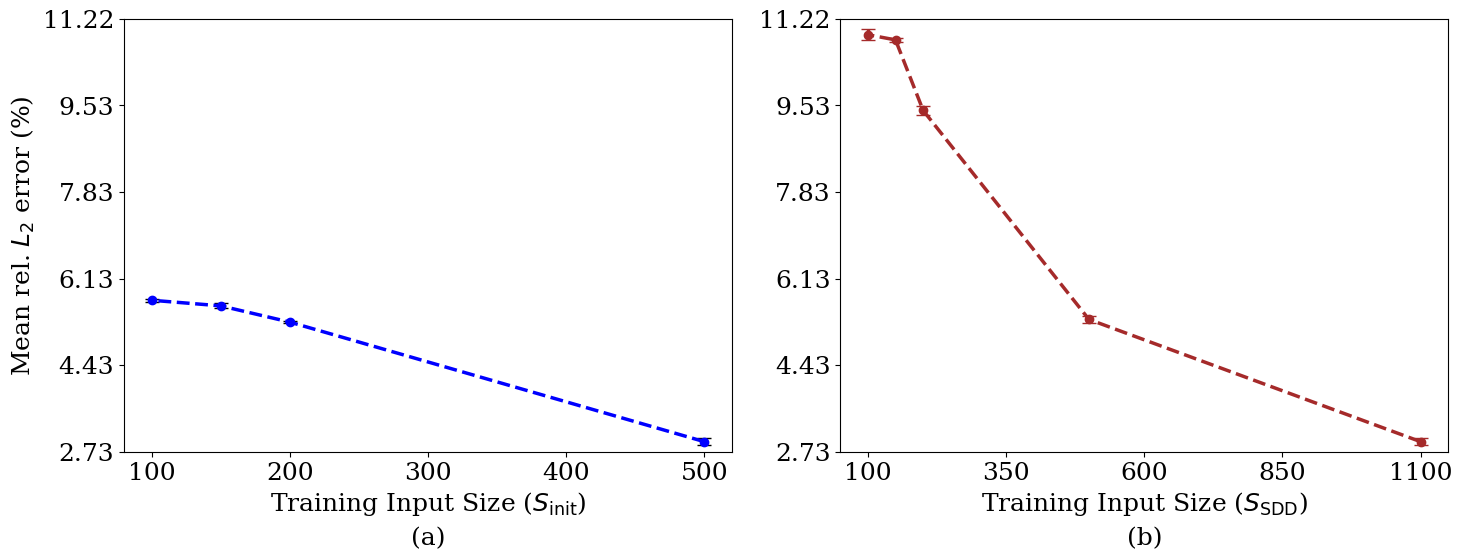

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

# Sample sizes
sample_sizes1 = [500, 200, 150, 100]
sample_sizes2 = [1100, 500, 200, 150, 100] 

errors1 = {
    500: [2.9122, 3.0007, 2.7993, 2.9912, 2.9703],
    200: [5.2880, 5.3086, 5.2701, 5.2954, 5.2307],
    150: [5.5398, 5.6230, 5.6472, 5.6464, 5.5291],
    100: [5.7587, 5.6864, 5.7117, 5.6918, 5.6852]
}

errors2 = {
    1100: [2.9122, 3.0007, 2.7993, 2.9912, 2.9703],  
    500: [5.3145, 5.2106, 5.3233, 5.4242, 5.3803],
    200: [9.3150, 9.5164, 9.4995, 9.3050, 9.4963],
    150: [10.7598, 10.8678, 10.7949, 10.8574, 10.7686],
    100: [10.9891, 10.9903, 10.9811, 10.8990, 10.6980]
}

mean_errors1 = [np.mean(errors1[size]) for size in sample_sizes1]
std_errors1 = [np.std(errors1[size]) for size in sample_sizes1]

mean_errors2 = [np.mean(errors2[size]) for size in sample_sizes2]
std_errors2 = [np.std(errors2[size]) for size in sample_sizes2]

y_min = min(min(mean_errors1) - 0.2, min(mean_errors2) - 0.2)
y_max = max(max(mean_errors1) + 0.2, max(mean_errors2) + max(std_errors2) + 0.2)

font = {'family': 'serif', 'size': 18}
plt.rc('font', **font)
plt.rc('lines', linewidth=1.5)  # Increase line width for better visibility

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

xticks1 = np.linspace(min(sample_sizes1), max(sample_sizes1), 5)
xticks2 = np.linspace(min(sample_sizes2), max(sample_sizes2), 5)

# Plotting first subplot
axes[0].errorbar(sample_sizes1, mean_errors1, ecolor='black', yerr=std_errors1, fmt='-o', capsize=5, linewidth=2.5, linestyle='--', color='blue')
axes[0].set_xlabel('Training Input Size ($S_\mathrm{init}$)', fontsize=18)
axes[0].set_ylabel('Mean rel. $L_2$ error (%)', fontsize=18)
axes[0].set_ylim(y_min, y_max)  # Set y-axis limits to be the same for both plots
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axes[0].set_yticks(np.round(np.linspace(y_min, y_max, 6), 4))  # Show y-ticks with decimal precision
axes[0].set_xticks(xticks1)  # Uniform x-ticks
axes[0].text(0.5, -0.20, '(a)', transform=axes[0].transAxes, ha='center', va='center', fontsize=18)

# Plotting second subplot
axes[1].errorbar(sample_sizes2, mean_errors2, yerr=std_errors2, fmt='-o', capsize=5, linewidth=2.5, linestyle='--', color='brown')
axes[1].set_xlabel('Training Input Size ($S_\mathrm{SDD}$)', fontsize=18)
axes[1].set_ylim(y_min, y_max)  # Set y-axis limits to be the same for both plots
axes[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axes[1].set_yticks(np.round(np.linspace(y_min, y_max, 6), 4))  # Show y-ticks with decimal precision
axes[1].set_xticks(xticks2)  # Uniform x-ticks
axes[1].text(0.5, -0.20, '(b)', transform=axes[1].transAxes, ha='center', va='center', fontsize=18)

plt.tight_layout()
plt.savefig('/home/user/Documents/WaKeGP/experiments/C1_burger/results/burger_error2_15_09.pdf', format='pdf', dpi=600, bbox_inches='tight')

plt.show()
